In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
df = pd.read_csv('diabetes.csv')
print(df.head())
X = df.drop(columns=['Outcome'])
print(X.head())
y = df['Outcome'].values
print(y[0:5])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)


prediction = knn.predict(X_test)[0:5]
print("prediction=",prediction[0:5])
print("output",y_test[0:5])
                   
print('KNNClassifierModel Train Score is : ' , knn.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , knn.score(X_test, y_test))


prediction= [1 1 0 1 0]
output [0 0 0 0 0]
KNNClassifierModel Train Score is :  0.8387622149837134
KNNClassifierModel Test Score is :  0.6558441558441559


Text(0, 0.5, 'testing accuracy')

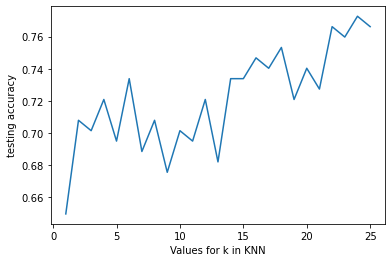

In [7]:
from sklearn import metrics

k_range = range(1,26)
scores = []
f1_score = []
recall_score=[]
precision_score=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
    f1_score.append(metrics.f1_score(y_test , y_pred) )
    recall_score.append(metrics.recall_score(y_test , y_pred) )
    precision_score.append(metrics.precision_score(y_test , y_pred) )
    
    
import matplotlib.pyplot as plt

plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')



Text(0, 0.5, 'testing precision')

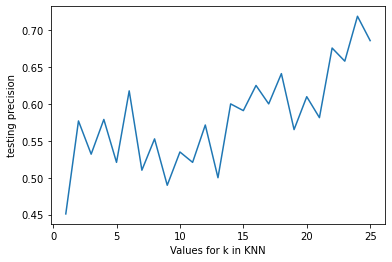

In [8]:
plt.plot(k_range , precision_score)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing precision')

Text(0, 0.5, 'testing recall')

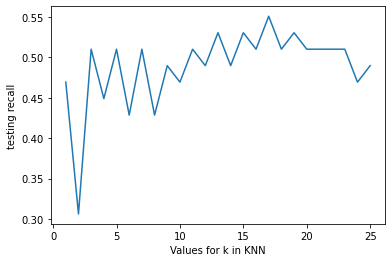

In [9]:
plt.plot(k_range , recall_score)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing recall')

Text(0, 0.5, 'testing f1')

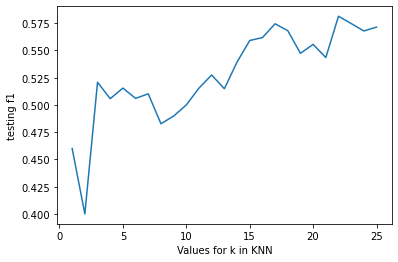

In [10]:
plt.plot(k_range , f1_score)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing f1')


Confusion Matrix is : 
 [[94 11]
 [25 24]]


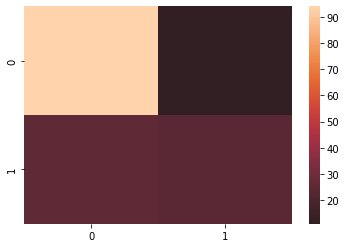

In [4]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(CM, center = True)
plt.show()

In [5]:
mae = metrics.mean_absolute_error(y_pred,y_test)
print("mean absolute error",mae)
mdea = metrics.median_absolute_error(y_pred,y_test)
print("median absolute error",mdea)
mse = metrics.mean_squared_error(y_pred,y_test)
print("mean squared error",mse)


mean absolute error 0.23376623376623376
median absolute error 0.0
mean squared error 0.23376623376623376


In [4]:
from sklearn.model_selection import KFold
k=5
kfold =KFold(n_splits=k, random_state=None, shuffle=False)

acclist=[]


for train_index, test_index in kfold.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    
   
    
    accuracy=accuracy_score(y_test,predictions)
    acclist.append(accuracy)
    
accuracy=sum(acclist)/k
print(acclist)    
    

[0.6818181818181818, 0.6558441558441559, 0.7532467532467533, 0.7581699346405228, 0.6797385620915033]
